# Upload the dataset

# Credit Card Fraud Detection

## Importing the libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

## Importing the dataset

In [74]:
df = pd.read_csv("creditcard.csv",on_bad_lines='skip')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Checking the discrepencies in the data and performing exploratory data analysis

In [75]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [77]:
len(df)

284807

In [78]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [79]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


### Checking the distribution of data

<AxesSubplot:xlabel='Class', ylabel='count'>

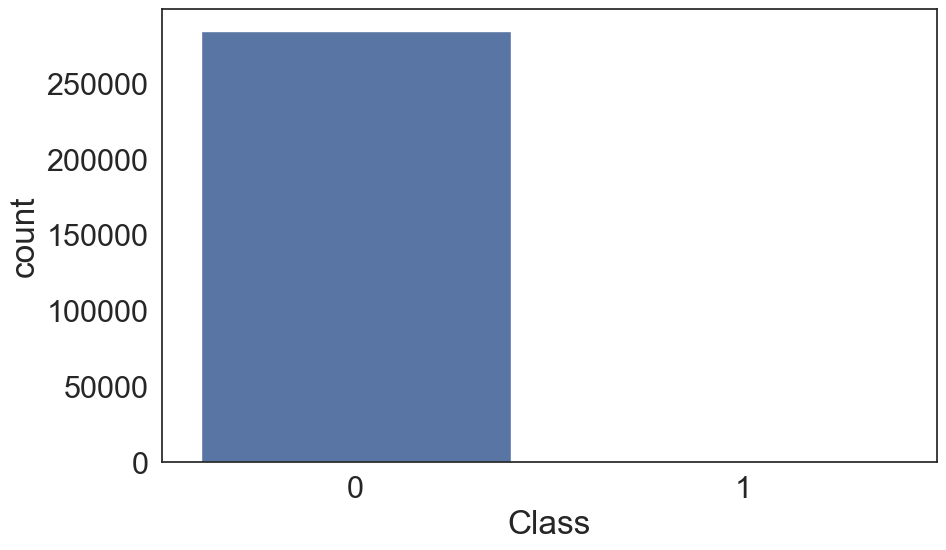

In [80]:
plt.figure(dpi=100, figsize=(10,6))
sns.countplot(data=df, x='Class')

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<AxesSubplot:ylabel='Class'>

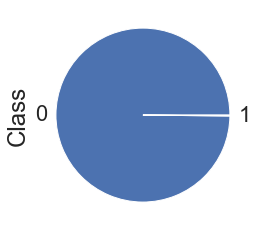

In [81]:
# Checking the class distribution of the target variable in percentage
print((df.groupby('Class')['Class'].count() / df['Class'].count()) * 100)
(df.groupby('Class')['Class'].count() / df['Class'].count() * 100).plot.pie()


In [82]:
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))

iplot(fig, filename='dist_only')

#Fraudulent transactions have a distribution more even than valid transactions - 
#are equaly distributed in time, including the low real transaction times, during night in Europe timezone.

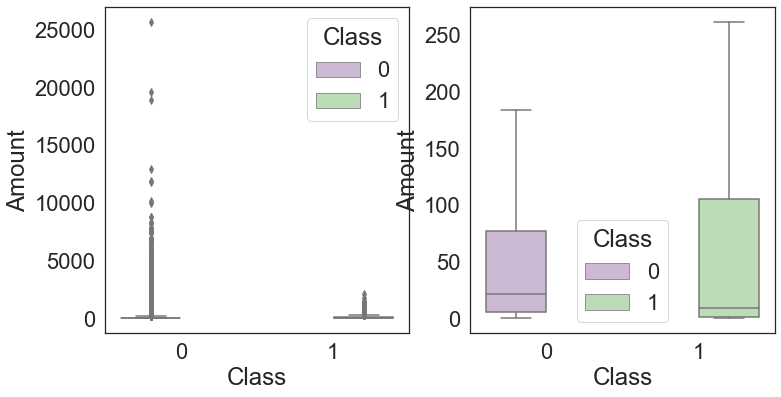

In [83]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show();

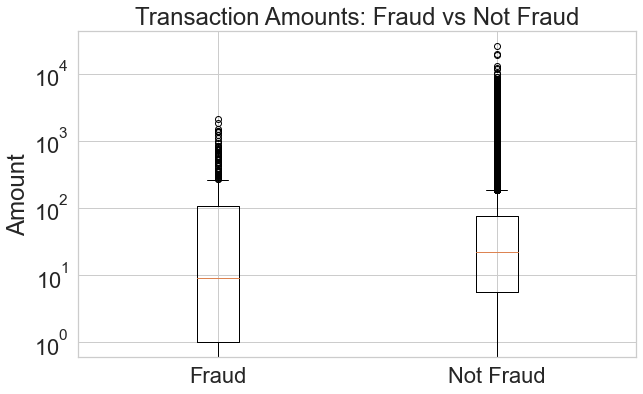

In [94]:
plt.figure(figsize=(10, 6))
plt.boxplot([df[df["Class"]==1]["Amount"], df[df["Class"]==0]["Amount"]], 
            labels=['Fraud', 'Not Fraud'])

plt.title('Transaction Amounts: Fraud vs Not Fraud')
plt.ylabel('Amount')
plt.yscale('log')
plt.show()

The typical fraudulent transaction is around 9.25, with the biggest one being 2125.87. On the other hand, regular transactions usually have a median value of 22, but the largest one can go up to 25691. This difference suggests that fraudsters might stay away from extremely large transactions, possibly to avoid triggering security measures. Another possibility is that there are just more normal transactions overall.

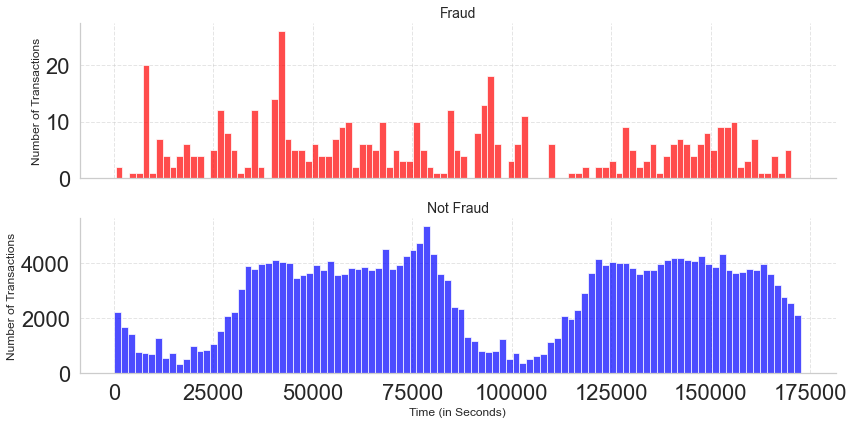

In [92]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6))

bins = 100

# Plotting for Fraud transactions
ax1.hist(df.Time[df.Class == 1], bins=bins, color='red', alpha=0.7)
ax1.set_title('Fraud', fontsize=14)
ax1.set_ylabel('Number of Transactions', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.5)

# Plotting for Normal transactions
ax2.hist(df.Time[df.Class == 0], bins=bins, color='blue', alpha=0.7)
ax2.set_title('Not Fraud', fontsize=14)
ax2.set_xlabel('Time (in Seconds)', fontsize=12)
ax2.set_ylabel('Number of Transactions', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.5)

# Remove top and right spines
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

The red bars on the graph show fraudulent transactions. Imagine the x-axis as a timeline in seconds and the y-axis as the number of transactions. Fraudulent ones happen less often than normal transactions, which you can see because the red bars are shorter. Also, there are peaks at specific times, hinting that fraud might happen in bursts or at certain moments instead of being spread out evenly.Now, look at the blue bars for normal transactions – they have more bars, meaning there are more of them. The pattern is steady, like a repeating cycle. It seems like there are times when a lot of transactions happen, like in the mornings and evenings when people often use their credit cards.

### Checking the effect of `Amount` and `Time` columns of the dataset on `Class`

<AxesSubplot:xlabel='Amount', ylabel='Class'>

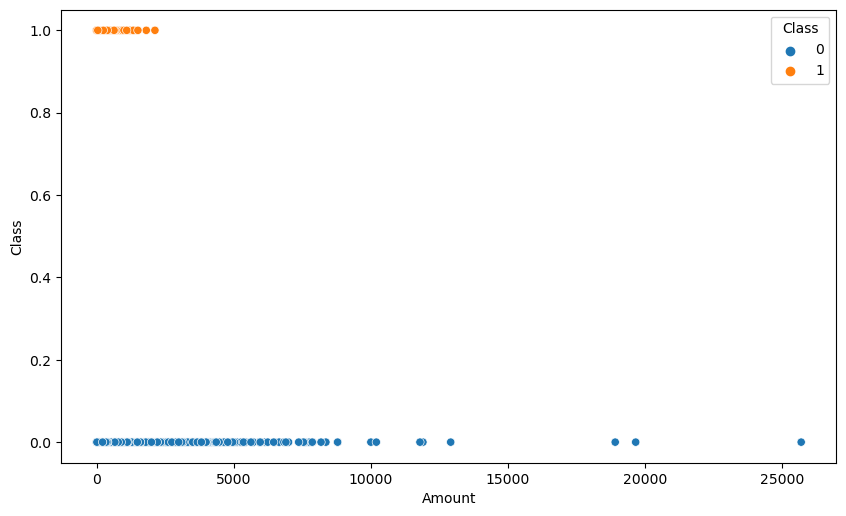

In [39]:
plt.figure(dpi=100, figsize=(10,6))
sns.scatterplot(data=df, x='Amount', y='Class', hue='Class')

<AxesSubplot:xlabel='Time', ylabel='Class'>

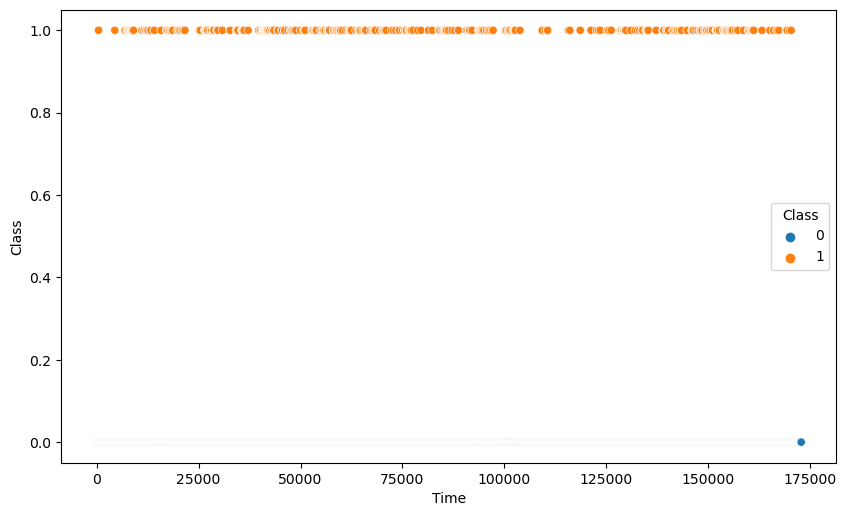

In [40]:
plt.figure(dpi=100, figsize=(10,6))
sns.scatterplot(data=df, x='Time', y='Class', hue='Class', )

### Dropping the non impactful columns

In [41]:
df = df.drop(['Time'], axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Scaling `Amount` feature for better results

In [42]:
sc = StandardScaler()
amount = df['Amount'].values

df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


### Checking the Distribution of various features of our dataset

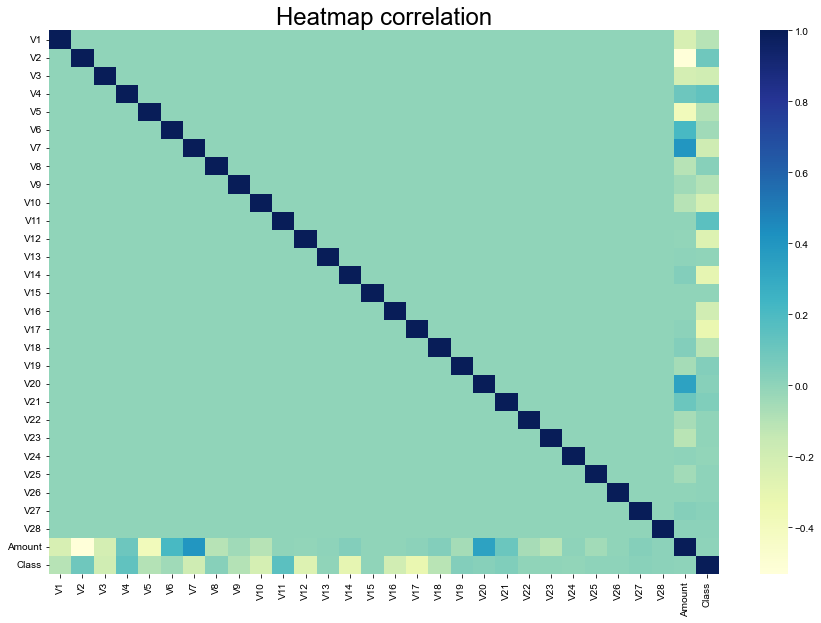

In [43]:
df_corr = df.corr() # Calculation of the correlation coefficients in pairs,
plt.figure(figsize=(15,10))
sns.heatmap(df_corr, cmap="YlGnBu") # Displaying the Heatmap
sns.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

<Figure size 432x288 with 0 Axes>

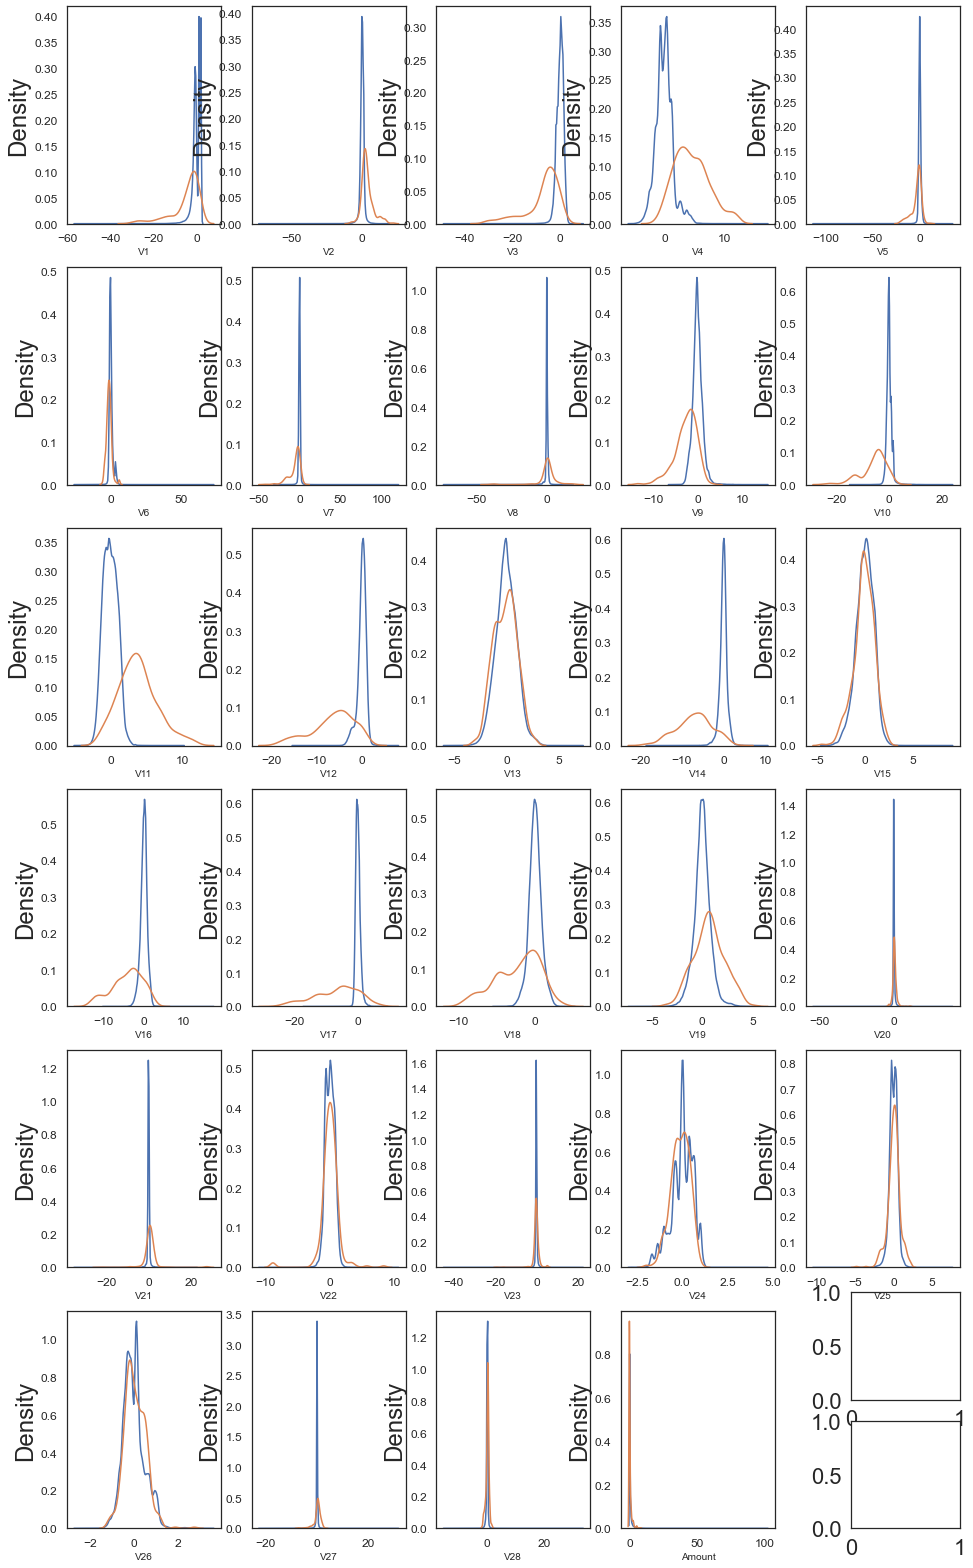

In [44]:
columns = list(df.columns.values)
columns.remove("Class")
n = 1
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(12,7,figsize=(16,28))

for i in columns:
    plt.subplot(6,5,n)
    sns.kdeplot(t0[i],label="0")
    sns.kdeplot(t1[i],label="1")
    plt.xlabel(i, fontsize=10)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    n =n + 1
plt.show();

## Preparing the dataset for training

In [45]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

### Splitting the dataset into training and validation sets

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, test_size=0.4)
len(X_train)

170884

### Creating synthetic data using `SMOTE` (Since the dataset is imbalanced)

In [47]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'), y_train)
print("Before performing smote : ", Counter(y_train))
print("After performing smote : ", Counter(y_train_smote))

Before performing smote :  Counter({0: 170580, 1: 304})
After performing smote :  Counter({0: 170580, 1: 170580})


In [48]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object
scaler = StandardScaler() #check if it already save the mean, and std

# Fit and transform the scaler on the training data
X_train_smote = scaler.fit_transform(X_train_smote)

# Use the same mean and std to transform the testing data
X_test = scaler.transform(X_test)

In [49]:
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_train_smote - ",X_train_smote.shape)
print("y_train_smote - ",y_train_smote.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (170884, 29)
y_train -  (170884,)
X_train_smote -  (341160, 29)
y_train_smote -  (341160,)
X_test -  (113923, 29)
y_test -  (113923,)


## Testing various models on the dataset

### 1.1. Logistic Regression without synthetic data

In [50]:
model_ws_1 = LogisticRegression(solver='lbfgs', max_iter=1000)
model_ws_1.fit(X_train, y_train)
y_pred_ws_1 = model_ws_1.predict(X_test)
acc_ws_1 = accuracy_score(y_test, y_pred_ws_1)
acc_ws_1

C:\Users\prish\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.9983936518525671

Logistic Regression CV without synthetic data

In [51]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.model_selection import train_test_split, KFold
model_ws_1b = LogisticRegressionCV(Cs=30, cv=10, penalty="l1", n_jobs=8, max_iter=1000, solver="liblinear")
fit = model_ws_1b.fit(X_train, y_train)

y_pred_ws_1b = model_ws_1b.predict(X_test)
acc_ws_1b = accuracy_score(y_test, y_pred_ws_1)
acc_ws_1b

C:\Users\prish\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(


0.9983936518525671

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [52]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# Prepare data (X, Y), build a model, and predict into Yh
res11 = accuracy_score(y_test, y_pred_ws_1b)

print("\n", "Accuracy: ".format(format(res11,'.3f')))
print("\n", "CFM: \n", confusion_matrix(y_test, y_pred_ws_1b))
print("\n", "Classification report: \n", classification_report(y_test, y_pred_ws_1b))


 Accuracy: 

 CFM: 
 [[113731      4]
 [   180      8]]

 Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    113735
           1       0.67      0.04      0.08       188

    accuracy                           1.00    113923
   macro avg       0.83      0.52      0.54    113923
weighted avg       1.00      1.00      1.00    113923



### 1.2 Logistic Regression with synthetic data

In [53]:
model_s_1 = LogisticRegression(solver='lbfgs', max_iter=1000)
model_s_1.fit(X_train_smote, y_train_smote)
y_pred_s_1 = model_s_1.predict(X_test)
acc_s_1 = accuracy_score(y_test, y_pred_s_1)
acc_s_1

0.9726218586238073

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [54]:
res12 = accuracy_score(y_test, y_pred_s_1)

print("\n", "Accuracy: ".format(format(res12,'.3f')))
print("\n", "CFM: \n", confusion_matrix(y_test, y_pred_s_1))
print("\n", "Classification report: \n", classification_report(y_test, y_pred_s_1))


 Accuracy: 

 CFM: 
 [[110634   3101]
 [    18    170]]

 Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99    113735
           1       0.05      0.90      0.10       188

    accuracy                           0.97    113923
   macro avg       0.53      0.94      0.54    113923
weighted avg       1.00      0.97      0.98    113923



### 2.1. Decision Tree Classifier without synthetic data

In [55]:
model_ws_2 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model_ws_2.fit(X_train, y_train)
y_pred_ws_2 = model_ws_2.predict(X_test)
acc_ws_2 = accuracy_score(y_test, y_pred_ws_2)
acc_ws_2

C:\Users\prish\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.9983673182763797

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model
#### Confusion Matrix,

In [56]:
res21 = accuracy_score(y_test, y_pred_ws_2)

print("\n", "Accuracy: ".format(format(res21,'.3f')))
print("\n", "CFM: \n", confusion_matrix(y_test, y_pred_ws_2))
print("\n", "Classification report: \n", classification_report(y_test, y_pred_ws_2))


 Accuracy: 

 CFM: 
 [[113735      0]
 [   186      2]]

 Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    113735
           1       1.00      0.01      0.02       188

    accuracy                           1.00    113923
   macro avg       1.00      0.51      0.51    113923
weighted avg       1.00      1.00      1.00    113923



### 2.2. Decision Tree Classifier with synthetic data

In [57]:
model_s_2 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model_s_2.fit(X_train_smote, y_train_smote)
y_pred_s_2 = model_s_2.predict(X_test)
acc_s_2 = accuracy_score(y_test, y_pred_s_2)
acc_s_2

0.9727535265047444

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [58]:
res22 = accuracy_score(y_test, y_pred_s_2)

print("\n", "Accuracy: ".format(format(res22,'.3f')))
print("\n", "CFM: \n", confusion_matrix(y_test, y_pred_s_2))
print("\n", "Classification report: \n", classification_report(y_test, y_pred_s_2))


 Accuracy: 

 CFM: 
 [[110649   3086]
 [    18    170]]

 Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99    113735
           1       0.05      0.90      0.10       188

    accuracy                           0.97    113923
   macro avg       0.53      0.94      0.54    113923
weighted avg       1.00      0.97      0.98    113923



### 3.1. K Nearest Neighbors Classifier without synthetic data

In [59]:
model_ws_3 = KNeighborsClassifier(n_neighbors=3)
model_ws_3.fit(X_train, y_train)
y_pred_ws_3 = model_ws_3.predict(X_test)
acc_ws_3 = accuracy_score(y_test, y_pred_ws_3)
acc_ws_3

C:\Users\prish\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.9984902082985876

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [60]:
res31 = accuracy_score(y_test, y_pred_ws_3)

print("\n", "Accuracy: ".format(format(res31,'.3f')))
print("\n", "CFM: \n", confusion_matrix(y_test, y_pred_ws_3))
print("\n", "Classification report: \n", classification_report(y_test, y_pred_ws_3))


 Accuracy: 

 CFM: 
 [[113735      0]
 [   172     16]]

 Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    113735
           1       1.00      0.09      0.16       188

    accuracy                           1.00    113923
   macro avg       1.00      0.54      0.58    113923
weighted avg       1.00      1.00      1.00    113923



### 3.2. K Nearest Neighbors Classifier with synthetic data

In [61]:
model_s_3 = KNeighborsClassifier(n_neighbors=3)
model_s_3.fit(X_train_smote, y_train_smote)
y_pred_s_3 = model_s_3.predict(X_test)
acc_s_3 = accuracy_score(y_test, y_pred_s_3)
acc_s_3

0.9973929759574449

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [62]:
res32 = accuracy_score(y_test, y_pred_s_3)

print("\n", "Accuracy: ".format(format(res32,'.3f')))
print("\n", "CFM: \n", confusion_matrix(y_test, y_pred_s_3))
print("\n", "Classification report: \n", classification_report(y_test, y_pred_s_3))


 Accuracy: 

 CFM: 
 [[113468    267]
 [    30    158]]

 Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    113735
           1       0.37      0.84      0.52       188

    accuracy                           1.00    113923
   macro avg       0.69      0.92      0.76    113923
weighted avg       1.00      1.00      1.00    113923



### 4.1. Random Forest Classifier without synthetic data

In [63]:
model_ws_5 = RandomForestClassifier(max_depth=5, criterion='entropy')
model_ws_5.fit(X_train, y_train)
y_pred_ws_5 = model_ws_5.predict(X_test)
acc_ws_5 = accuracy_score(y_test, y_pred_ws_5)
acc_ws_5

C:\Users\prish\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.9983497625589214

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [64]:
res41 = accuracy_score(y_test, y_pred_ws_5)

print("\n", "Accuracy: ".format(format(res41,'.3f')))
print("\n", "CFM: \n", confusion_matrix(y_test, y_pred_ws_5))
print("\n", "Classification report: \n", classification_report(y_test, y_pred_ws_5))


 Accuracy: 

 CFM: 
 [[113735      0]
 [   188      0]]

 Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    113735
           1       0.00      0.00      0.00       188

    accuracy                           1.00    113923
   macro avg       0.50      0.50      0.50    113923
weighted avg       1.00      1.00      1.00    113923



C:\Users\prish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 4.2. Random Forest Classifier with synthetic data

In [65]:
model_s_5 = RandomForestClassifier(max_depth=5, criterion='entropy')
model_s_5.fit(X_train_smote, y_train_smote)
y_pred_s_5 = model_s_5.predict(X_test)
acc_s_5 = accuracy_score(y_test, y_pred_s_5)
acc_s_5

0.9946893954688694

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [66]:
res42 = accuracy_score(y_test, y_pred_s_5)

print("\n", "Accuracy: ".format(format(res42,'.3f')))
print("\n", "CFM: \n", confusion_matrix(y_test, y_pred_s_5))
print("\n", "Classification report: \n", classification_report(y_test, y_pred_s_5))


 Accuracy: 

 CFM: 
 [[113150    585]
 [    20    168]]

 Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    113735
           1       0.22      0.89      0.36       188

    accuracy                           0.99    113923
   macro avg       0.61      0.94      0.68    113923
weighted avg       1.00      0.99      1.00    113923



### 5.1. Support Vector Classifier without synthetic data

In [67]:
model_ws_6 = SVC()
model_ws_6.fit(X_train, y_train)
y_pred_ws_6 = model_ws_6.predict(X_test)
acc_ws_6 = accuracy_score(y_test, y_pred_ws_6)
acc_ws_6

C:\Users\prish\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.9983673182763797

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [68]:
res51 = accuracy_score(y_test, y_pred_ws_6)

print("\n", "Accuracy: ".format(format(res51,'.3f')))
print("\n", "CFM: \n", confusion_matrix(y_test, y_pred_ws_6))
print("\n", "Classification report: \n", classification_report(y_test, y_pred_ws_6))


 Accuracy: 

 CFM: 
 [[113735      0]
 [   186      2]]

 Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    113735
           1       1.00      0.01      0.02       188

    accuracy                           1.00    113923
   macro avg       1.00      0.51      0.51    113923
weighted avg       1.00      1.00      1.00    113923



In [ ]:
### 5.2. Support Vector Classifier with synthetic data

In [69]:
model_s_6 = SVC()
model_s_6.fit(X_train_smote, y_train_smote)
y_pred_s_6 = model_s_6.predict(X_test)
acc_s_6 = accuracy_score(y_test, y_pred_s_6)
acc_s_6

0.9920735935675852

#### Confusion Matrix

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [70]:
res52 = accuracy_score(y_test, y_pred_ws_6)

print("\n", "Accuracy: ".format(format(res52,'.3f')))
print("\n", "CFM: \n", confusion_matrix(y_test, y_pred_ws_6))
print("\n", "Classification report: \n", classification_report(y_test, y_pred_ws_6))


 Accuracy: 

 CFM: 
 [[113735      0]
 [   186      2]]

 Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    113735
           1       1.00      0.01      0.02       188

    accuracy                           1.00    113923
   macro avg       1.00      0.51      0.51    113923
weighted avg       1.00      1.00      1.00    113923



# Comparing precision, accuracy f1 score and recall of all the models

In [71]:
dp = pd.DataFrame([res11,res12,res21,res22,res31,res32,res41,res42,res51,res52],index=['1.1','1.2','2.1','2.2','3.1','3.2','4.1','4.2','5.1','5.2'])

In [72]:
dp

,0
1.1,0.998385
1.2,0.972622
2.1,0.998367
2.2,0.972754
3.1,0.998490
3.2,0.997393
4.1,0.998350
4.2,0.994689
5.1,0.998367
5.2,0.998367


In summary, the K-Nearest Neighbors (KNN) model outperforms Logistic Regression, Logistic Regression with Cross-Validation, Decision Tree, and Random Forest. However, it is important to note that the Support Vector Machine (SVM) stands out as the strongest performer among all six models.